# Ejercicio - Mi primer AutoEncoder con Keras

En este notebook vamos a ver cómo podemos implementar un autoencoder paso a paso. Todos los ejemplos están extraídos del propio blog de Keras, aquí tenéis el [enlace](https://blog.keras.io/building-autoencoders-in-keras.html) para su consulta.

Comenzemos recordando qué es un autoencoder. Para ello, mirad la imagen siguiente:

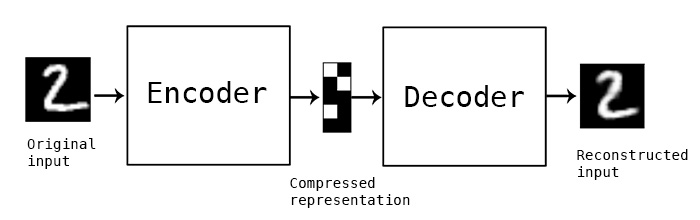

En ella podemos observar como consta de dos bloques: el encoder y el decoder.

Por una parte, el **encoder** toma los datos de entrada y los comprime en una representación mucho más compacta.

Por la otra, el **decoder** coge esa representación (o codificación) comprimida y trata de reconstruir los datos originales con el menor error posible.

A lo largo de esta práctica haremos lo siguiente:

* Empezaremos con un AutoEncoder muy simple, en el que tanto el encoder como el decoder tendrán una sola capa Densa.
* Complicaremos un poco más la arquitectura añadiendo más capas
* Cambiaremos la arquitectura para hacer uso de capas convolucionales
* Usaremos el AE convolucional para reducir el ruido presente en nuestras imágenes


**¡Comenzemos!**

Vamos a construir el AutoEncoder más simple posible utilizando el dataset del minst que poseen una dimensión de `28x28x1`:

In [3]:
import keras
from keras import layers
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input iamage
input_img = keras.Input(shape=(784,)) # TODO - Ingresar valor de dim (dim, )

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded) # TODO - Ingresar valor de dim (dim,activation='sigmoid')

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

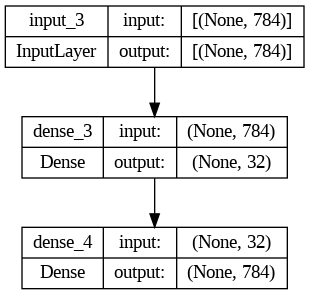

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)
from IPython.display import Image
Image(filename='autoencoder.png')

In [5]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [6]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [8]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

autoencoder.compile(optimizer='Adam', loss=cross_entropy) # TODO

In [9]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
# Le paso la imagen de entrada y la misma imagen de salida
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 6s 5ms/step - loss: 0.2766 - val_loss: 0.1903
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1711 - val_loss: 0.1544
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1456 - val_loss: 0.1353
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1295 - val_loss: 0.1220
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1185 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1112 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1060 - val_loss: 0.1027
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1022 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0995 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0976 - val_loss: 0.0956

In [12]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


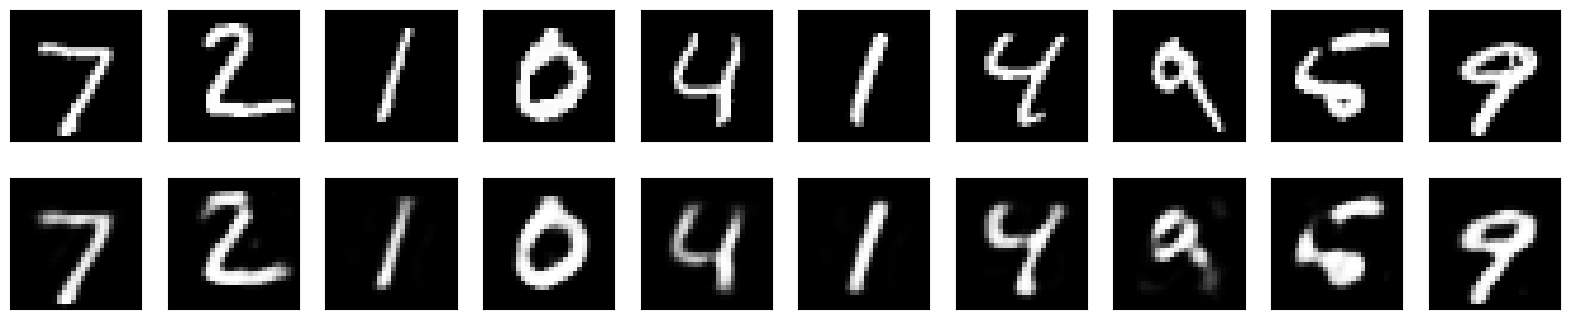

In [13]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28)) # TODO - Reconstruir en dimensión original
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28)) # TODO - Reconstruir en dimensión original
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

¡Ya tenemos nuestro primer autoencoder funcionando!

Además, tal y como podemos observar en el video de Geoffrey Hinton "[From PCA to autoencoders](https://www.youtube.com/watch?v=PSOt7u8u23w)", lo que está ocurriendo es que el autoencoder está calculando una representación comprimida de los datos (lo que obtenemos a la salida del encoder) que no es otra cosa que una aproximación a lo que obtendríamos si aplicásemos una PCA. Si no sabéis de lo que estamos hablando, os recomiendo que veáis el video anterior.